In [1]:
# install all modules need to be used in this lab
!pip install simpleaudio
!pip install pydub
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.4 MB/s eta 0:00:00:00:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp311-cp311-macosx_10_9_x86_64.whl size=2036075 sha256=d85d71e4f3966b2888d20a1df61fd1b03e8de68f1f49021f2c6149b3dedb8883
  Stored in directory: /Users/guochenxi/Library/Caches/pip/wheels/44/74/11/9d2cf6ddf5d0dcc7750484a371b92fdb036f5496d1d4b42d08
Successfully built simpleaudio


/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"


In [9]:
# Import necessary libraries
import scipy.io.wavfile as wav

# A. Read the original sound file
file_path = '/Users/guochenxi/Desktop/HW1.1/train32.wav'  # Replace with the actual path to your train.wav file
fs1, x1 = wav.read(file_path)

# Print the sampling rate and shape of x1
print(f"Sampling Rate: {fs1} Hz")
print(f"Shape of x1: {x1.shape}")



Sampling Rate: 32000 Hz
Shape of x1: (50313,)


In [15]:
# Import necessary libraries
import scipy.io.wavfile as wav
import numpy as np

# B. Write out two new versions of the file with different sampling rates
fs2 = int(fs1 / 2)
fs3 = int(1.5 * fs1)

# Ensure that the sampling frequency is an integer
x1 = np.asarray(x1, dtype=np.int16)

# Write the new versions of the file
wav.write('/Users/guochenxi/Desktop/HW1.1/train_16kHz.wav', fs2, x1)
wav.write('/Users/guochenxi/Desktop/HW1.1/train_48kHz.wav', fs3, x1)

In [18]:
# Import necessary libraries
import simpleaudio as sa

# C. Use simpleaudio to play the three different versions of the train sound file

# Function to play audio from a file
def play_audio(filename):
    wave_obj = sa.WaveObject.from_wave_file(filename)
    play_obj = wave_obj.play()
    play_obj.wait_done()

# Play the original file
play_audio('/Users/guochenxi/Desktop/HW1.1/train32.wav')

# Play the file with fs2
play_audio('/Users/guochenxi/Desktop/HW1.1/train_16kHz.wav')

# Play the file with fs3
play_audio('/Users/guochenxi/Desktop/HW1.1/train_48kHz.wav')

fs2 = int(fs1 / 2) make the original sound slower and lower volumn
fs3 = int(1.5 * fs1) make the sound highe pitcher

In [23]:
# Import necessary libraries
import numpy as np
import scipy.io.wavfile as wav

# Assuming you have already loaded x1 and defined fs1

# Define len1 and n0
len1 = len(x1)
n0 = int(len1 / 2)  # Index corresponding to t=0.5

# Create the discrete time signal s1
s1 = np.concatenate((np.ones(n0), 0.2 * np.ones(len1 - n0)))

# Multiply x1 with s1 to create v1
v1 = x1 * s1

# Save v1 to a wav file
wav.write('/Users/guochenxi/Desktop/HW1.1/v1.wav', fs1, v1)

In [24]:
# Import necessary libraries
import numpy as np
import scipy.io.wavfile as wav

# Assuming you have already loaded x1 and defined fs1

# Define the length of the signal
len1 = len(x1)

# Create the discrete-time decaying ramp signal r1
r1 = 1 - np.arange(len1) / len1

# Multiply x1 with r1 to create v2
v2 = x1 * r1

# Save v2 to a wav file
wav.write('/Users/guochenxi/Desktop/HW1.1/v2.wav', fs1, v2)

In [27]:
# Import necessary libraries
import simpleaudio as sa

# Assuming you have already loaded x1, v1, v2, and defined fs1

# Function to play audio from a numpy array
def play_audio_array(signal):
    wave_obj = sa.WaveObject(signal, 1, 2, fs1)
    play_obj = wave_obj.play()
    play_obj.wait_done()

# Play the original, v1, and v2 together
play_audio_array(x1)
play_audio_array(v1)
play_audio_array(v2)


Report discussion
V1 has an abrupt decrease in amplitude after the first half of the signal, causing an immediate reduction in volume.
V2 gradually decreases linearly over the entire duration of the signal, resulting in a smoother reduction in volume.
If i define  defined s1 to take value 2 for the [0,0.5] range, it would cause an abrupt increase in amplitude at the beginning of the signal, and this increased amplitude would persist until t=0.5
If i want a smooth but faster decay in amplitude, i would use linear decay signal, like v2

In [34]:
def timescale(x,fs,a):
    n,d = decimal.Decimal(a).as_integer_ratio()
    y= sig.resample_poly(x,d,n)
    t=np.arange(0,len(y),1)*(1/fs)
    return y,t

In [28]:
# Assuming you have loaded x1 and defined fs1

# Function to perform time scaling
def timescale(signal, time, scale_factor):
    new_time = time / scale_factor
    return np.interp(new_time, np.arange(len(signal)), signal)

# Define the scale factor
a = 2

# Create w(t) using timescale function
w = timescale(x1, np.arange(len(x1)), a)
t_w = np.arange(len(w)) / fs1  # Time vector for w(t)

# Now, 'w' contains the values of w(t) and 't_w' contains the corresponding time values.


In [29]:
# Assuming you have loaded x1 and defined fs1

# Function to perform time scaling
def timescale(signal, time, scale_factor):
    new_time = time * scale_factor
    return np.interp(new_time, np.arange(len(signal)), signal)

# Define the scale factor
a = 0.5

# Create v(t) using timescale function
v = timescale(x1, np.arange(len(x1)), a)
t_v = np.arange(len(v)) / fs1  # Time vector for v(t)

# Now, 'v' contains the values of v(t) and 't_v' contains the corresponding time values.


In [31]:
# Assuming you have loaded x1 and defined fs1

# Generate the time vector for the original signal x1
t_x1 = np.arange(len(x1)) / fs1

# Create a time-reversed version z(t) = x1(-t)
z = np.flip(x1)
t_z = t_x1  # Time vector for z(t)

# Ensure the array is C-contiguous
z = np.ascontiguousarray(z)

# Now, 'z' contains the values of z(t) and 't_z' contains the corresponding time values.



In [33]:
# Import necessary libraries
import scipy.io.wavfile as wav

# Assuming you have already loaded x1 and defined fs1

# Generate the time vector for the original signal x1
t_x1 = np.arange(len(x1)) / fs1

# Create a time-reversed version z(t) = x1(-t)
z = np.flip(x1)
t_z = t_x1  # Time vector for z(t)

# Ensure the array is C-contiguous
z = np.ascontiguousarray(z)

# Save z to a WAV file
wav.write('/Users/guochenxi/Desktop/HW1.1/z.wav', fs1, z)


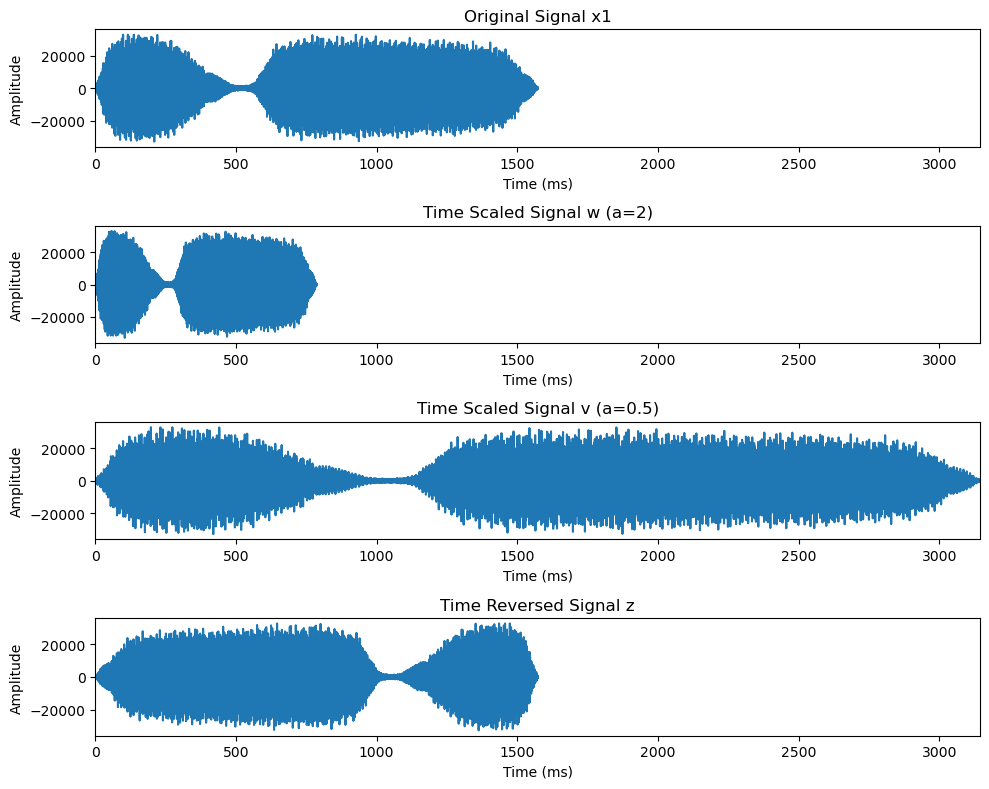

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal as sig
from fractions import Fraction

# Attempt to read the WAV file and handle potential exceptions
try:
    fs1, x1 = wavfile.read('/Users/guochenxi/Desktop/HW1.1/train32.wav')
    x1 = x1.astype(np.float64)
except Exception as e:
    print("Error reading the file:", e)
    exit()

def timescale(x, fs, a):
    fraction = Fraction.from_float(a).limit_denominator(1000)
    y = sig.resample_poly(x, fraction.denominator, fraction.numerator)
    t = np.arange(0, len(y), 1) * (1.0 / fs)
    return y, t

# Try to apply the timescale function to create signals w and v
try:
    w, t_w = timescale(x1, fs1, 2)
    v, t_v = timescale(x1, fs1, 0.5)
except Exception as e:
    print("Error processing signals:", e)
    exit()

# Create the time-reversed signal z
z = x1[::-1]
t_z = np.arange(len(z)) / fs1

# Convert time vectors to milliseconds
t_x1 = np.arange(len(x1)) / fs1 * 1000
t_w *= 1000
t_v *= 1000
t_z *= 1000

# Get the maximum length of all time vectors (in milliseconds)
max_t = max(t_x1[-1], t_w[-1], t_v[-1], t_z[-1])

# Plotting the signals
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

# Plot the original signal x1
axs[0].plot(t_x1, x1)
axs[0].set_title('Original Signal x1')
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim([0, max_t])

# Plot the time-scaled signal w
axs[1].plot(t_w, w)
axs[1].set_title('Time Scaled Signal w (a=2)')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlim([0, max_t])

# Plot the time-scaled signal v
axs[2].plot(t_v, v)
axs[2].set_title('Time Scaled Signal v (a=0.5)')
axs[2].set_xlabel('Time (ms)')
axs[2].set_ylabel('Amplitude')
axs[2].set_xlim([0, max_t])

# Plot the time-reversed signal z
axs[3].plot(t_z, z)
axs[3].set_title('Time Reversed Signal z')
axs[3].set_xlabel('Time (ms)')
axs[3].set_ylabel('Amplitude')
axs[3].set_xlim([0, max_t])

plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import simpleaudio as sa
import scipy.io.wavfile as wav
from scipy import signal as sig
from fractions import Fraction

# ... (previous code remains unchanged)

# Play the original signal x1
play_obj_x1 = sa.play_buffer((x1 * 32767).astype(np.int16), 1, 2, fs1)
play_obj_x1.wait_done()

# Play the time-scaled signal w
play_obj_w = sa.play_buffer((w * 32767).astype(np.int16), 1, 2, fs1)
play_obj_w.wait_done()

# Play the time-scaled signal v
play_obj_v = sa.play_buffer((v * 32767).astype(np.int16), 1, 2, fs1)
play_obj_v.wait_done()

# Play the time-reversed signal z
play_obj_z = sa.play_buffer((z * 32767).astype(np.int16), 1, 2, fs1)
play_obj_z.wait_done()


Report discussion:
If a student runs the plt.figure(figsize=(10, 8)) command before every call to subplot in the provided code, each subplot (representing the original signal x1, and the transformed signals w, v, and z) will be displayed in separate figures instead of a single figure with four subplots. This would result in multiple independent plot windows, making it more challenging to compare and analyze the signals collectively. It is crucial to call the figure command once before creating all subplots to maintain the intended layout and visualization of the signals in a unified figure.

In [8]:
import numpy as np

def timeshift(x, fs, t0):
    # Find the integer shift n0 given t0 and fs
    n0 = int(np.round(t0 * fs))
    
    # Initialize the output signal y
    y = np.zeros_like(x)
    
    # Conditional control for time delay or advance
    if n0 >= 0:
        # For time delay, concatenate a zero vector with the original signal
        y = np.concatenate((np.zeros(n0), x))
    else:
        # For time advance, copy the portion starting from n0 and append n0 zeroes
        y = x[-n0:]
        y = np.concatenate((y, np.zeros(-n0)))
    
    # Create a time vector corresponding to the output signal length
    t_y = np.arange(0, len(y), 1) * (1/fs)
    
    return y, t_y


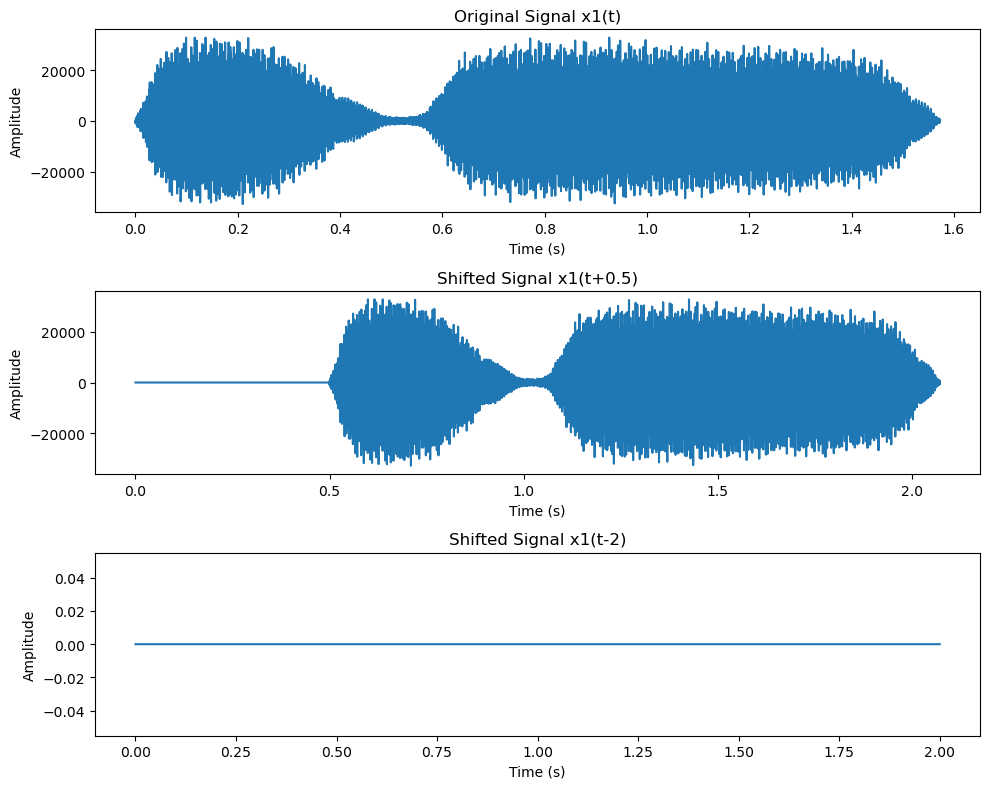

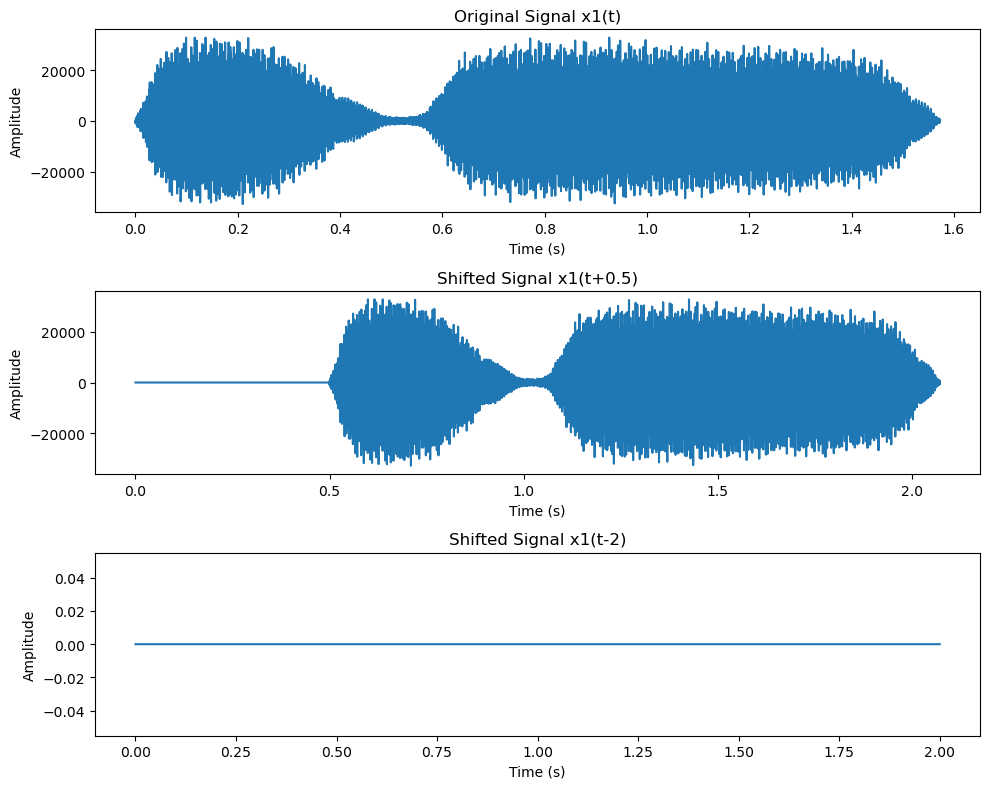

In [11]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import numpy as np

# Assuming x1 is already loaded
fs1, x1 = wav.read('/Users/guochenxi/Desktop/HW1.1/train32.wav')

# Define the timeshift function
def timeshift(x, fs, t0):
    n0 = int(np.round(t0 * fs))
    y = np.zeros_like(x)
    if n0 >= 0:
        y = np.concatenate((np.zeros(n0), x))
    else:
        y = x[-n0:]
        y = np.concatenate((y, np.zeros(-n0)))
    t_y = np.arange(0, len(y), 1) * (1/fs)
    return y, t_y

# Create x1(t+0.5)
x1_shifted_pos = timeshift(x1, fs1, 0.5)

# Create x1(t-2)
x1_shifted_neg = timeshift(x1, fs1, -2)

# Plot the signals
plt.figure(figsize=(10, 8))

# Plot x1(t)
plt.subplot(3, 1, 1)
plt.plot(np.arange(0, len(x1))/fs1, x1)
plt.title('Original Signal x1(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot x1(t+0.5)
plt.subplot(3, 1, 2)
plt.plot(x1_shifted_pos[1], x1_shifted_pos[0])
plt.title('Shifted Signal x1(t+0.5)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot x1(t-2)
plt.subplot(3, 1, 3)
plt.plot(x1_shifted_neg[1], x1_shifted_neg[0])
plt.title('Shifted Signal x1(t-2)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import numpy as np

# Assuming x1 is already loaded
fs1, x1 = wav.read('/Users/guochenxi/Desktop/HW1.1/train32.wav')

# Define the timeshift function
def timeshift(x, fs, t0):
    n0 = int(np.round(t0 * fs))
    y = np.zeros_like(x)
    if n0 >= 0:
        y = np.concatenate((np.zeros(n0), x))
    else:
        y = x[-n0:]
        y = np.concatenate((y, np.zeros(-n0)))
    t_y = np.arange(0, len(y), 1) * (1/fs)
    return y, t_y

# Create x1(t+0.5)
x1_shifted_pos = timeshift(x1, fs1, 0.5)

# Create x1(t-2)
x1_shifted_neg = timeshift(x1, fs1, -2)

# Plot the signals
plt.figure(figsize=(10, 8))

# Plot x1(t)
plt.subplot(3, 1, 1)
plt.plot(np.arange(0, len(x1))/fs1, x1)
plt.title('Original Signal x1(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot x1(t+0.5)
plt.subplot(3, 1, 2)
plt.plot(x1_shifted_pos[1], x1_shifted_pos[0])
plt.title('Shifted Signal x1(t+0.5)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot x1(t-2)
plt.subplot(3, 1, 3)
plt.plot(x1_shifted_neg[1], x1_shifted_neg[0])
plt.title('Shifted Signal x1(t-2)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


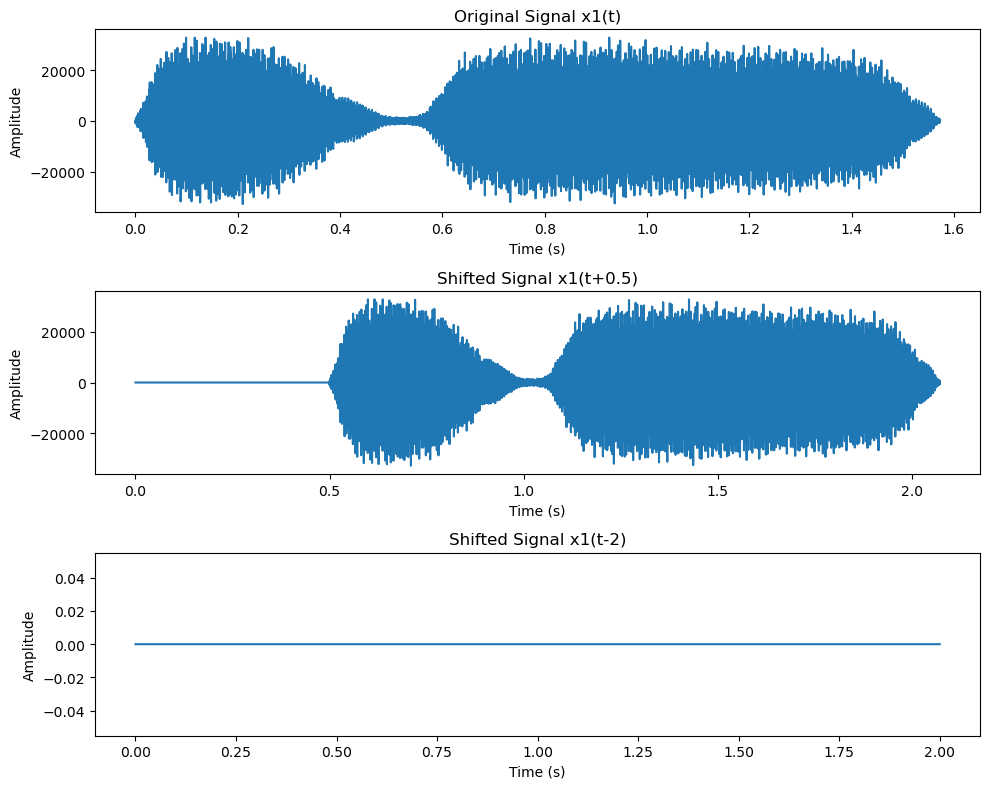

In [14]:
import numpy as np
import simpleaudio as sa
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Assuming x1 is already loaded
fs1, x1 = wav.read('/Users/guochenxi/Desktop/HW1.1/train32.wav')

# Define the timeshift function
def timeshift(x, fs, t0):
    n0 = int(np.round(t0 * fs))
    y = np.zeros_like(x)
    if n0 >= 0:
        y = np.concatenate((np.zeros(n0), x))
    else:
        y = x[-n0:]
        y = np.concatenate((y, np.zeros(-n0)))
    t_y = np.arange(0, len(y), 1) * (1/fs)
    return y, t_y

# Create x1(t+0.5) and x1(t-2)
x1_shifted_pos = timeshift(x1, fs1, 0.5)
x1_shifted_neg = timeshift(x1, fs1, -2)

# Function to play audio using simpleaudio
def play_audio(signal, fs):
    play_obj = sa.play_buffer((signal * 32767).astype(np.int16), 1, 2, fs)
    play_obj.wait_done()

# Play x1(t)
play_audio(x1, fs1)

# Play x1(t+0.5)
play_audio(x1_shifted_pos[0], fs1)

# Play x1(t-2)
play_audio(x1_shifted_neg[0], fs1)

# Plot the signals
plt.figure(figsize=(10, 8))

# Plot x1(t)
plt.subplot(3, 1, 1)
plt.plot(np.arange(0, len(x1))/fs1, x1)
plt.title('Original Signal x1(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot x1(t+0.5)
plt.subplot(3, 1, 2)
plt.plot(x1_shifted_pos[1], x1_shifted_pos[0])
plt.title('Shifted Signal x1(t+0.5)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot x1(t-2)
plt.subplot(3, 1, 3)
plt.plot(x1_shifted_neg[1], x1_shifted_neg[0])
plt.title('Shifted Signal x1(t-2)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


Report: 
The current implementation of the timeshift function can handle the case when the shift is zero and small shift like +0.5. However, for the case of an advance larger than the original signal or nagetiv number, like x1(t-2), it is too bigger than original signal and turn out to be zero. In general, the function can better handle zero and small time shift.